<a href="https://colab.research.google.com/github/Shivprasad-Rao/SentimentAnalysis-LLM_NaiveBayes_LogisticRegression_NeuralNetwork/blob/main/SentimentAnalysis_NaiveBayes%2CLogisticRegression%2CNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/CSCI264-ProjectFiles/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data = data.loc[:10000] #Subset of the whole dataset

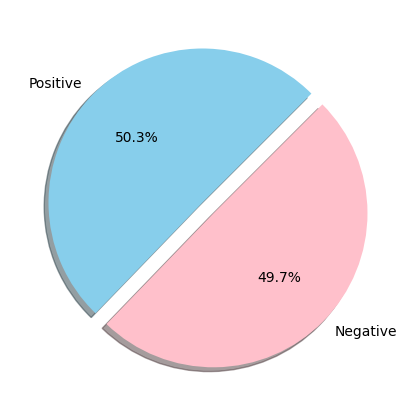

In [7]:
#Visualize the distribution of the data

fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['sentiment']=='positive']
neg=data[data['sentiment']=='negative']
ck=[pos['sentiment'].count(),neg['sentiment'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [8]:
#Data cleaning and preprocessing

import re
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')
             text = text.split()
             text = [porter.stem(word) for word in text if not word in stop]
             text = ' '.join(text)
             return text

def add_label(state):
  if "positive" in state:
    return 1
  else:
    return 0


data['review']=data['review'].apply(preprocessor)
data['label'] = data['sentiment'].apply(add_label)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,label
0,one review mention watch 1 oz episod hook righ...,positive,1
1,wonder littl product film techniqu unassum old...,positive,1
2,thought wonder way spend time hot summer weeke...,positive,1
3,basic famili littl boy jake think zombi closet...,negative,0
4,petter mattei love time money visual stun film...,positive,1


In [9]:
data['review'][0]

'one review mention watch 1 oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


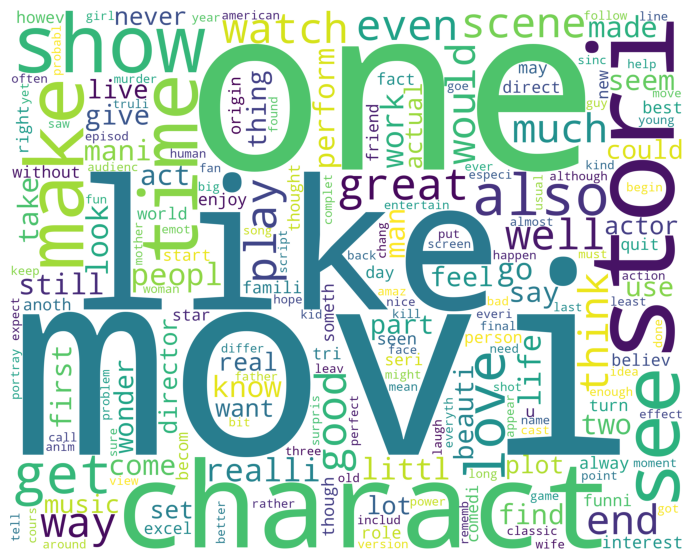

Negative words are as follows


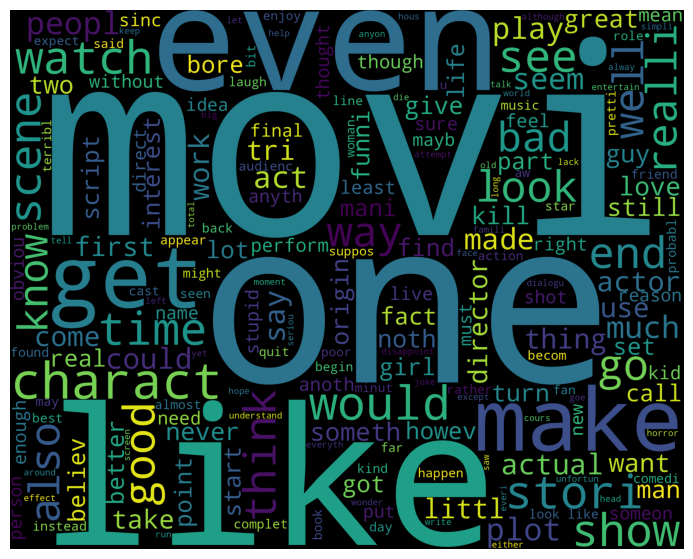

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['sentiment'] == 'positive']
positivedata =positivedata['review']
negdata = data[data['sentiment'] == 'negative']
negdata= negdata['review']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

Naive Bayes

Accuracy(%):  83.68326334733054


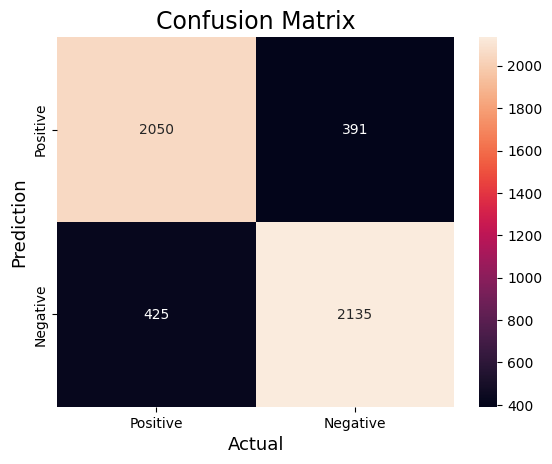

In [11]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(max_features=2500)
count.fit(data.review)
cv_X = count.transform(data.review).toarray()
cv_y = data.label.values

# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cv_X, cv_y, random_state=0, test_size=0.5, shuffle=False)

# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_naive = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_naive.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
nb_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy(%): ",nb_accuracy*100)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Logistic Regression

Accuracy(%):  86.98260347930415


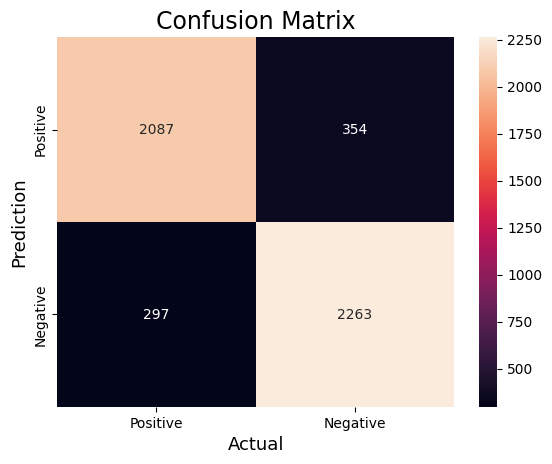

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit(data.review)
x=tfidf.transform(data.review)

y=data.label.values


# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

# Training model using predefined Logistic Regression

from sklearn.linear_model import LogisticRegression
spam_detect_logistic = LogisticRegression().fit(X_train,y_train)
y_pred = spam_detect_logistic.predict(X_test)

# Model Accuracy, how often is the classifier correct?

from sklearn.metrics import confusion_matrix, accuracy_score
conf_matr = confusion_matrix(y_test,y_pred)
lr_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy(%): ",lr_accuracy*100)

sns.heatmap(conf_matr,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Neural Network

In [22]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(max_features=10000)
count.fit(data.review)
cv_X = count.transform(data.review).toarray()
cv_y = data.label.values

# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cv_X, cv_y, random_state=0, test_size=0.25, shuffle=False)

from keras.utils import to_categorical
from keras import models
from keras import layers

model = models.Sequential()

# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                500050    
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505201 (1.93 MB)
Trainable params: 50520

In [23]:
results = model.fit(
X_train, y_train,
epochs= 2,
batch_size = 32,
validation_data = (X_test, y_test)
)

Epoch 1/2
235/235 [==============================] - 6s 21ms/step - loss: 0.4362 - accuracy: 0.8093 - val_loss: 0.3255 - val_accuracy: 0.8689
Epoch 2/2
235/235 [==============================] - 3s 13ms/step - loss: 0.1847 - accuracy: 0.9329 - val_loss: 0.3477 - val_accuracy: 0.8653


Accuracy: 86.53%
79/79 [==============================] - 0s 4ms/step


<ipython-input-24-be1c589c54e7>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = int(np.round(y_pred[i],0))


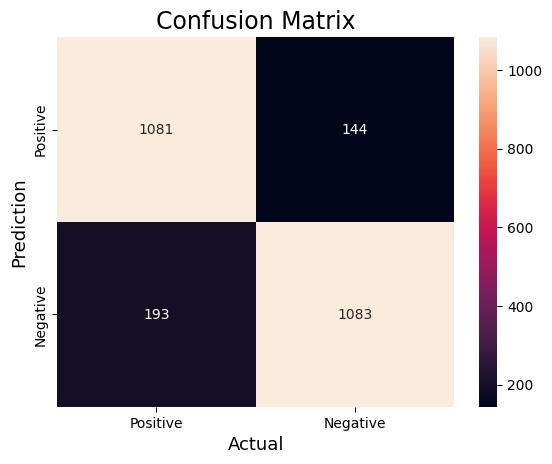

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)
nn_accuracy = scores[1]
print("Accuracy: %.2f%%" % (nn_accuracy*100))

y_pred = model.predict(X_test)

for i in range(len(y_pred)):
  y_pred[i] = int(np.round(y_pred[i],0))

from sklearn.metrics import confusion_matrix, accuracy_score
conf_matr = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_matr,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

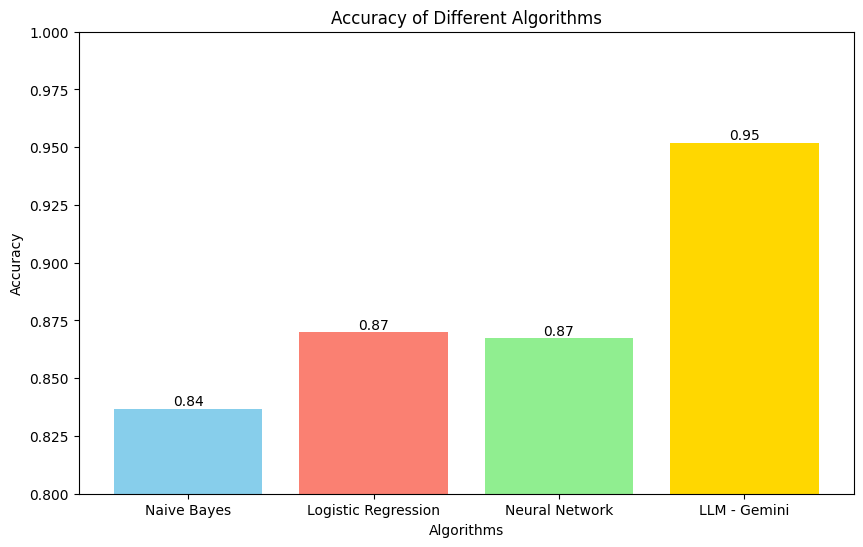

In [16]:
algorithms = ['Naive Bayes', 'Logistic Regression', 'Neural Network', 'LLM - Gemini']
llm_accuracy =  0.95199
accuracy = [nb_accuracy, lr_accuracy, nn_accuracy, llm_accuracy]

# Define colors for each algorithm
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plotting the bar chart with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracy, color=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0.8, 1)  # Limiting y-axis to better visualize differences

# Adding labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [17]:
def nb_predict_label(input_text):
    input_vector = count.transform([input_text]).toarray()
    prediction = spam_detect_naive.predict(input_vector)
    return prediction[0]

def lr_predict_label(input_text):
    input_vector = tfidf.transform([input_text])
    prediction = spam_detect_logistic.predict(input_vector)
    return prediction[0]

def nn_predict_label(input_text):
    input_vector = count.transform([input_text]).toarray()
    prediction = model.predict(input_vector)
    return int(np.round(prediction[0][0]))

# Test the model with custom input
#custom_input = "This movie is fantastic!"
custom_input = "This movie is very bad"
predicted_label = nn_predict_label(custom_input)
sentiment = 'positive' if predicted_label == 1 else 'negative'
print("Predicted Sentiment:", sentiment)

1/1 [==============================] - 0s 46ms/step
Predicted Sentiment: negative
